# Лабораторная работа №5
___

**Цель работы: изучение алгоритмов и методов классификации на практике.**
___

## 1. Обработка данных файла
___

**Для начала импортируем необходимые библиотеки для выполнения работы**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    balanced_accuracy_score, f1_score, confusion_matrix, 
    roc_curve, auc, classification_report
)

**numpy** (np): Фундаментальная библиотека для научных вычислений. Используется для работы с многомерными массивами, генерации случайных чисел (в функции создания данных) и выполнения математических операций.

**pandas** (pd): Основной инструмент для анализа табличных данных. Используется для создания датафреймов (DataFrame), чтения CSV-файлов, манипуляций с данными (группировка, выборка).

**matplotlib** (plt): Библиотека для построения графиков. Используется для отрисовки диаграмм рассеяния (scatter plots), графиков "метода локтя" и настройки внешнего вида фигур.

**seaborn** (sns): Надстройка над matplotlib, предоставляющая более красивые и сложные статистические графики. Здесь используется для построения матрицы диаграмм рассеяния (pairplot).

**train_test_split**: Функция из sklearn.model_selection, используемая для разделения всего набора данных на обучающую (train) и тестовую (test) выборки. Это позволяет оценить, насколько хорошо модель обобщает данные.

**StandardScaler**: Класс для стандартизации данных. Приводит признаки к нулевому среднему и единичной дисперсии, что критически важно для алгоритмов, основанных на расстояниях (как K-means).

**LabelEncoder**: Класс для преобразования текстовых категориальных меток в числа.
KNeighborsClassifier (Метод K ближайших соседей): Алгоритм классификации, основанный на расстоянии, который присваивает объекту класс, наиболее распространенный среди его k ближайших соседей.

**DecisionTreeClassifier**: Алгоритм, строящий модель в виде структуры дерева.

**LogisticRegression**: Линейный классификатор, который, несмотря на название, используется для прогнозирования вероятности принадлежности объекта к определенному классу.

**RandomForestClassifier**: Ансамблевый метод, который строит множество (лес) независимых деревьев решений.

**accuracy_score**: Доля верно классифицированных объектов от общего числа.

**precision_score**: Доля положительных предсказаний, которые действительно были правильными.

**recall_score**: Доля положительных объектов, которые модель смогла корректно обнаружить.

**f1_score**: Гармоническое среднее точности и полноты. Используется для поиска баланса между этими двумя метриками.

**balanced_accuracy_score**: Среднее арифметическое полноты для каждого класса. Рекомендуется для оценки качества на несбалансированных данных.

**confusion_matrix**: Таблица, визуализирующая производительность алгоритма, показывая количество истинно положительных, ложно положительных, истинно отрицательных и ложно отрицательных результатов.

**roc_curve**: Используется для расчета точек кривой, которая показывает зависимость между долей истинно положительных и ложно положительных результатов.
**auc** Вычисляет площадь под этой кривой, являясь одной из ключевых метрик качества классификации.

**classification_report**: Выводит полный текстовый отчет со значениями точности, полноты, F1-меры и поддержки для каждого класса.

**Далее считаем данные с файла, содержащего данные и выведем первые 5 строк для понимания структуры файла.**

In [9]:
df = pd.read_csv('medical_diagnosis.csv')
print(f"Объём данных: {df.shape}")
display(df.head())

Объём данных: (3031, 14)


,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0


Набор данных medical_diagnosis.csv Содержит информацию о болезнях

age — возраст пациента (лет), числовой.

sex — пол: Male / Female , категориальный.

BMI — индекс массы тела (кг/м²), числовой.

systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.

cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.

fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.

smoking_status — статус курения: Never / Former / Current , категориальный.

family_history — наследственность по заболеванию: Yes / No , категориальный.

activity_level — уровень физической активности: Low / Moderate / High , категориальный.

symptom_score — суммарная выраженность симптомов (0–10), числовой.

CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.

WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.

ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH , категориальный.

Disease — целевой класс : 1 — болеет, 0 — не болеет .

___
## 2. Предварительная обработка данных
___

В первом пункте был загружен набор данных, содержащий медицинские показатели пациентов (возраст, ИМТ, уровни холестерина и глюкозы, статус курения и др.) и целевую переменную Disease (наличие заболевания). В данном пункте проводилась предварительная обработка данных.
Вначалае была произведена обработка пропусков. Если в строке пациента отсутствует хотя бы один показатель (например, уровень глюкозы), пациент исключался из анализа. Это гарантирует, что модели будут обучаться только на полных и достоверных данных, не внося искажений искусственным заполнением.

Алгоритмы машинного обучения оперируют числами. Текстовые признаки (sex, smoking_status, ECG_result и др.) были преобразованы с помощью One-Hot Encoding (создание бинарных столбцов для каждой категории). Это предотвращает создание ложного порядка между категориями. Для каждого уникального значения категории создается отдельный столбец (бинарный признак 0/1). Удаляется первый столбец, чтобы избежать мультиколлинеарности (ловушки фиктивных переменных). Например, если есть столбцы sex_Male и sex_Female, они полностью дублируют друг друга (если не Male, то Female). Достаточно оставить только sex_Male.

Реализация в коде:

df.select_dtypes(include=['object']): Автоматически выбирает имена столбцов, содержащих текстовые данные.

pd.get_dummies(df, columns=..., drop_first=True): Функция, которая преобразует выбранные категориальные столбцы в набор бинарных столбцов (например, smoking_status превратится в smoking_status_Former, smoking_status_Never и т.д.).

In [11]:
# Проверка на пропущенные значения
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    print(f"Обнаружено {missing_count} пропущенных значений (ячеек).")
    initial_rows = df.shape[0]
        
    # Удаляем все строки, где есть хотя бы одно значение NaN
    df.dropna(inplace=True)
        
    dropped_rows = initial_rows - df.shape[0]
    print(f"Удалено строк с пропусками: {dropped_rows}")
    print(f"Текущая размерность данных: {df.shape}")
else:
    print("Пропущенных значений не обнаружено.")

# Кодирование категориальных признаков    
# Определение категориальных колонок
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки для кодирования: {categorical_cols}")

# drop_first=True удаляет первую колонку, чтобы избежать мультиколлинеарности (важно для линейных моделей)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Пропущенных значений не обнаружено.
Категориальные признаки для кодирования: ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']


___
## 3. Выделение целевой переменной и визуализация
___

В данном пункте было необходимо разделить таблицу на матрицу признаков и целевую перемменную. Целевой переменной был выбран столбец Disease (0 — здоров, 1 — болен). Следующим шагом строилась диаграмма рассеивания переменных с выделение другим цветом болеющих людей, что позволяет визуально оценить, насколько хорошо заболевание отделяется по этим признакам

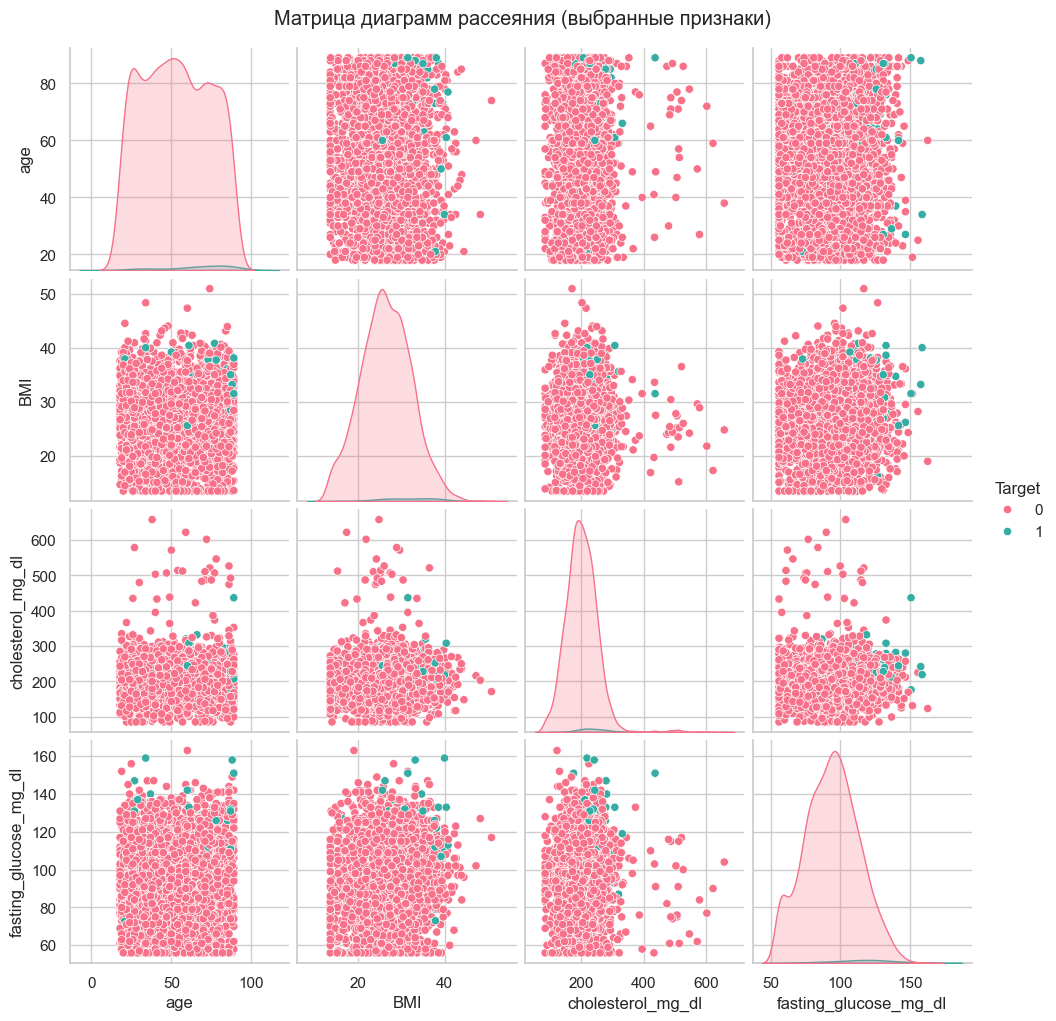

In [15]:
# Целевая переменная 'Disease' (наличие болезни)
target_col = 'Disease'

# Разделение на матрицу признаков (X) и вектор ответов (y)
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

# Построение матрицы диаграмм рассеяния (Scatter Matrix)
# Выбираем несколько важных числовых признаков для наглядности, 
# так как полный pairplot может быть огромным.
numerical_cols_for_plot = ['age', 'BMI', 'cholesterol_mg_dl', 'fasting_glucose_mg_dl']
    
plot_data = df[numerical_cols_for_plot].copy()
plot_data['Target'] = df[target_col]

sns.set(style="whitegrid")    
sns.pairplot(plot_data, hue='Target', palette='husl', diag_kind='kde')
plt.suptitle("Матрица диаграмм рассеяния (выбранные признаки)", y=1.02)
plt.show()

___
## 4. Разбиение и стандартизация
___

### 4.1 Разбиение на обучающую и тестовую выборки
___

Производилось деление данных в пропорции 80/20. Модель училась на 80% данных, а проверяло надежность полученных данных на отложенных 20%. Производилось такое деление, так как нельзя было проверять модель на тех же данных, на которых она училась (это привело бы к переобучению).

random_state=10: "Зерно" генератора случайных чисел. Гарантирует, что при каждом запуске программы разбиение будет одинаковым (гарантирует воспроизводимость результата).

stratify=y: Стратификация. Это очень важно. Функция гарантирует, количество больных в тестовой и оучающей выборках будет одинаковым. Без этого в тест могли бы попасть только здоровые люди.

In [16]:
# Разбиение: 80% тренировка, 20% тест
# random_state фиксирует случайность для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
    
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2424, 16)
Размер тестовой выборки: (607, 16)


___
### 4.2 Стандартизация данных
___

Проводилась стандартизация данных. Так как признак "Возраст" меняется в диапазоне [20, 80], а "Лейкоциты" — [4, 11], разброс значений возраста численно больше. Без масштабирования алгоритм решит, что разница в возрасте в 10 лет важнее, чем разница в лейкоцитах в 5 единиц (хотя с медицинской точки зрения скачок лейкоцитов критичнее). Поэтому применялось z масштабирование. В результате все признаки приводятся к единому масштабу, что уравнивает их вклад в расчет расстояний.

Реализация в коде:

StandardScaler(): Класс из sklearn для Z-преобразования.

fit_transform(X_train): Вычисляет среднее и дисперсию на обучающей выборке и сразу преобразует её.

transform(X_test): Применяет параметры (среднее и дисперсию), вычисленные на train, к test. Не производилась стандартизация на тестовых данных, чтобы точно определить качество обученной модели.

In [17]:
# Стандартизация (Z-масштабирование)
# Формула: z = (x - u) / s
scaler = StandardScaler()
    
# Обучаем scaler только на тренировочной выборке, чтобы избежать утечки данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

___
### 5. Обучение моделей
___

В данном пункте производилось обучение предсказательной модели качественного отклика методами: k- ближайших соседей, дерево решений, логистическая регрессия, случайный лес.

**Метод k-ближайших соседей**

Механизм: k-NN является непараметрическим, ленивым алгоритмом, основанным на метрике расстояния. Для классификации нового объекта алгоритм вычисляет расстояние от этого объекта до всех объектов в обучающей выборке. Выбирает k ближайших соседей. Присваивает новому объекту класс, который является наиболее частым среди этих k соседей (голосование по большинству). Поскольку k-NN полностью зависит от расстояния, критически важна предварительная стандартизация данных, чтобы все признаки имели одинаковый вклад в метрику расстояния.

Параметр n_neighbors=5:
Этот гиперпараметр k определяет, сколько соседей будет учтено при голосовании. Обычно выбирают нечётное значение k, чтобы избежать ничьей в голосовании для классификации. Выбор k=5 является компромиссом, слишком малое k (например, k=1) делает модель чрезвычайно чувствительной к шуму и выбросам, что может привести к сильному переобучению. Слишком большое k приводит к размыванию локальных границ и недообучению, так как учитываются объекты из других кластеров. Значение 5 обеспечивает хороший баланс.

**Дерево решений**

Дерево решений представляет собой структуру, где каждый внутренний узел обозначает проверку одного из признаков, каждая ветвь представляет собой возможный результат этой проверки, а каждый листовой узел представляет собой конечный классификационный результат. Построение дерева решений начинается с корневого узла, который содержит все обучающие данные. Затем, на каждом шаге, алгоритм выбирает признак, который наилучшим образом разделяет данные на классы, используя определенную метрику, такую как индекс Джини или энтропия Шеннона. Это позволяет наиболее эффективно
разделять данные и минимизировать ошибку классификации. Процесс построения дерева продолжается рекурсивно для каждого нового узла, пока не достигнуты определенные условия остановки, такие как достижение максимальной глубины дерева или достаточного количества объектов на каждом листовом узле.
Основные параметры DecisionTreeClassifier , которые можно настроить: максимальная глубина дерева ( max_depth ), по умолчанию не ограничена, но ограничение позволит избежать переобучения, критерий разделения ( criterion ) – "gini" (по умолчанию) для индекса Джини, "entropy" для энтропии Шеннона, минимальное количество объектов в листовом узле ( min_samples_leaf )

Параметр max_depth=5:
Ограничение максимальной глубины дерева является ключевым инструментом для борьбы с переобучением. Если позволить дереву расти до упора, оно будет создавать слишком специфичные ветки, идеально подходящие для каждого отдельного примера из обучающей выборки, но не способные обобщаться на новые данные. Глубина 5 заставляет модель искать только самые важные и общие закономерности в данных.

**Логистическая регрессия**

Логистическая регрессия предсказывает вероятность принадлежности объекта к классу с помощью логистической функции, также называемой сигмоидной функцией. В параметрах можно изменить алгоритм оптимизации ( solver ), используемый для оценки модели: "lbfgs" , "newton-cg" , "liblinear" , "sag" и "saga" , максимальное количество итераций сходимости оптимизационного алгоритма ( max_iter ), по умолчанию 100.

Это преобразование сжимает результат в диапазон от 0 до 1, который интерпретируется как вероятность. Модель находит оптимальные веса путем минимизации функции потерь с помощью градиентного спуска.

Параметр max_iter=1000:
Этот параметр определяет максимальное количество итераций, которое алгоритм градиентного спуска будет выполнять для поиска оптимального набора весов (коэффициентов). Поскольку мы используем стандартизованные данные, сходимость происходит быстрее, но увеличение лимита до 1000 гарантирует, что алгоритм успеет найти оптимальное решение (или максимально близкое к нему), прежде чем остановится.

**Случайный лес**

Случайный лес комбинирует прогнозы нескольких деревьев решений для достижения более точного и стабильного результата. В качестве основных параметров
можно указать n_estimators – количество деревьев в случайном лесу, чем оно больше, тем выше точность, но тем больше требуется вычислительных ресурсов, criterion, max_depth для ограничения глубины каждого дерева.

Параметр n_estimators=100:
Этот параметр задает количество деревьев в лесу. Увеличение числа деревьев, как правило, повышает точность ансамбля, но при этом увеличивается время обучения. 100 деревьев — это стандартный, хорошо зарекомендовавший себя компромисс между вычислительной эффективностью и производительностью классификации.

In [ ]:
# Словарь для хранения моделей и их названий
models = {
    "k-Ближайших соседей (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Дерево решений (DT)": DecisionTreeClassifier(random_state=10, max_depth=5),
    "Логистическая регрессия (LR)": LogisticRegression(random_state=10, max_iter=1000),
    "Случайный лес (RF)": RandomForestClassifier(random_state=10, n_estimators=100)
}

___
## 6. Оценка качества, матрица неточностей, ROC-кривая
___

В данном пункте производилась оценка качества обученных моделей.

Первой метрикой является доля правильных ответов (**Accuracy**), и означает она отношение числа верных прогнозов к общему количеству прогнозов. Данная метрика полезна для хорошо сбалансированных классов, когда объектов каждого класса примерно поровну, а в случае несбалансированных данных будет не информативна.

Далее исследовался показатель **Precision** – это доля объектов, называемые классификатором положительными и при этом действительно являющихся положительными: данная метрика отражает, насколько надежна модель при классификации положительных меток, демонстрирует способность отличать класс 1 от других классов. В бизнесе данная метрика нужна, если каждое срабатывание модели – факт отнесения к положительному классу стоит ресурсов.

Следующим шагом рассчитывалась полнота (**Recall**) – это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм: Полнота нацелена на минимизацию противоположных рисков, показывает сколько реальных объектов класса 1 удалось обнаружить с помощью модели. Эта метрика полезна при диагностике заболеваний, так как лучше отправить пациента на повторное обследование, что пропустить настоящий диагноз.

Потом производился расчёт сбалансированной точности  (**Balanced Accuracy**). Среднее арифметическое между чувствительностью и специфичностью. Эта метрика позволяет объективно оценить производительность модели на несбалансированных данных, так как она одинаково взвешивает точность на каждом классе. Преимущество: Если классы сильно несбалансированы (например, 95% здоровых, 5% больных), обычная Accuracy будет высокой, но Balanced Accuracy останется близка к 0.5, если модель не способна предсказывать редкий класс. Таким образом, эта метрика дает честную оценку.

Последней метрикой стала **F1-мера** – среднее гармоническое значение точности и полноты, обозначает, как много сделано правильных прогнозов, и сколько положительных объектов модель не пропустит. Эта метрика учитывает баланс между Recall и Precision: F1-мера достигает максимума при полноте и точности, равных единице, и близка к нулю, если один из аргументов близок к нулю.

Каждая метрика принимает значения от 0 до 1. Чем ближе к единице, тем лучше. Расчёт метрик реализован в sklearn в модуле metrics . Как правило функции для вычисления метрики принимают на вход два аргумента: правильные ответы и предсказания модели, а возвращают значение указанной метрики.

Также производилось построение **матрицы неточностей**, которая является визуальным и математическим инструментом, который дает подробную картину того, как работает классификатор. Матрица строится путем сравнения истинных (реальных) классов с предсказанными классами:

$$\begin{pmatrix}
\text{Истинно отрицательные (TN)} & \text{Ложноположительные (FP)} \\
\text{Ложноотрицательные (FN)} & \text{Истинно положительные (TP)}
\end{pmatrix}$$

Истинно положительный: Модель предсказала 1 (болен), и истинный класс 1 (болен). Успех.
Истинно отрицательный: Модель предсказала 0 (здоров), и истинный класс 0 (здоров). Успех.
Ложноположительный: Модель предсказала 1 (болен), но истинный класс 0 (здоров). Ошибка I рода, "Неправильное предсказание".
Ложноотрицательный: Модель предсказала 0 (здоров), но истинный класс 1 (болен). Ошибка II рода, "Пропуск цели".

**ROC-кривая** — это график, который иллюстрирует производительность бинарного классификатора при изменении его порога классификации.

Алгоритмы классификации обычно генерируют числовые прогнозы и используют порог для определения, принадлежит ли классифицируемый объект к классу 0 или 1. Однако, при использовании метрик оцениваются сами предсказания классов, которые уже учитывают выбранный порог. Путём изменения порога можно влиять на значения этих метрик, например, увеличивая полноту за счет уменьшения точности. Для того чтобы оценить качество числовых прогнозов до применения порога или при использовании разных порогов применяются ROC-кривые. ROC-кривая представляет собой график, который показывает изменение отношения между верными положительными (True Positive Rate) и ложными положительными (False Positive Rate) классификациями в зависимости от изменения порога классификации. Порог классификации (или пороговое значение) — это критическая точка, которую модель машинного обучения использует для преобразования вероятности в бинарный класс (например, "болен" или "здоров"). Кривая — это исследование порогов. ROC-кривая строится путем перебора всех возможных порогов (от 0.0 до 1.0). Порог 0.9: Модель будет очень строгой. Она почти всегда предскажет "здоров", что приведет к очень низкому FPR (мало ложных ответов), но и к очень низкому TPR (много пропущенных больных). Это будет точка в нижнем левом углу графика. Порог 0.1: Модель будет очень чувствительной. Она почти всегда предскажет "болен", что приведет к высокому TPR (найдем почти всех больных), но и к высокому FPR (много ложных ответов).

При построении ROC-кривой, классификатор сначала сортирует объекты по их вероятностям принадлежности к положительному классу. Затем порог постепенно
изменяется от минимально возможного до максимально возможного значений. Каждый раз, когда порог меняется, вычисляются значения True Positive Rate (частота верных положительных классификаций) и False Positive Rate (частота неверных положительных классификаций). В идеальном случае, когда классификатор предсказывает все верно, FPR = 0, TPR = 1 и ROC AUC = 1.
Можно не только проводить визуальную оценку кривых, но и получить числовую оценку качества: площадь под кривой (AUC-ROC – Area Under Curve Receiver Operating Characteristic).
Значение AUC равное 0,5 означает случайное предсказание (классификатор выдает одинаковое количество TP и FP), а значение AUC равное 1 означает идеальную модель предсказания классификации.

<Figure size 1000x800 with 0 Axes>

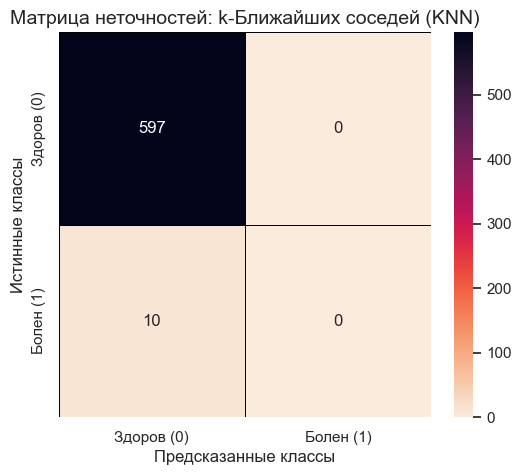

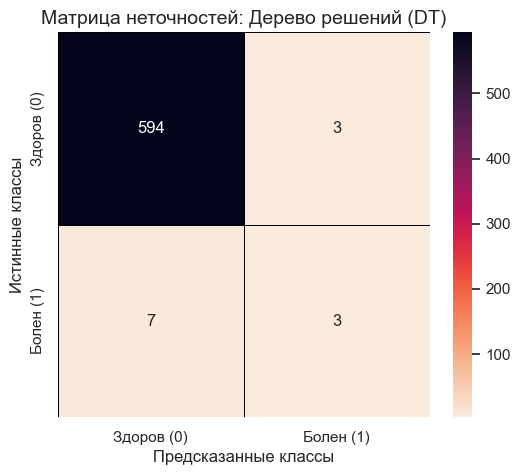

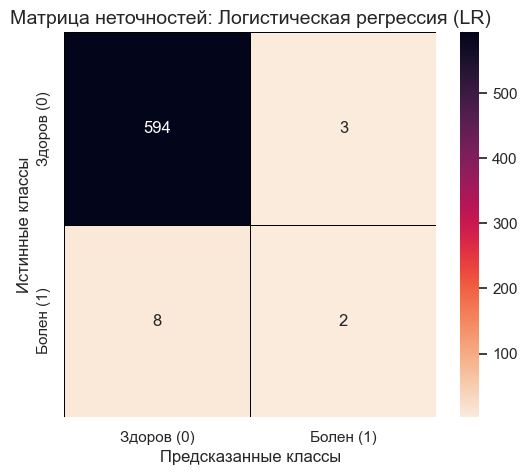

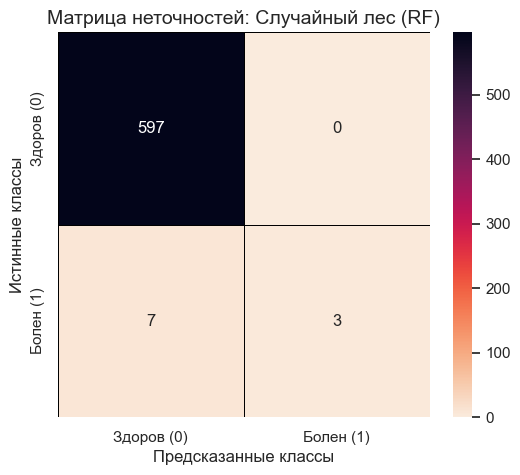

,Accuracy,Precision,Recall,Balanced Accuracy,F1 Score
k-Ближайших соседей (KNN),0.983526,0.0,0.0,0.500000,0.000000
Дерево решений (DT),0.983526,0.5,0.3,0.647487,0.375000
Логистическая регрессия (LR),0.981878,0.4,0.2,0.597487,0.266667
Случайный лес (RF),0.988468,1.0,0.3,0.650000,0.461538


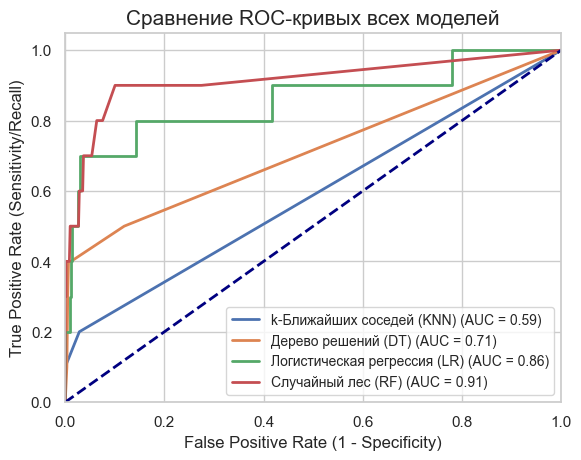

In [34]:
# Словарь для сохранения результатов
results = {}
    
plt.figure(figsize=(10, 8))
roc_data = {} 
for name, model in models.items():
    # Для деревьев масштабирование не обязательно, но не вредит. 
    # Используем масштабированные данные для всех для единообразия сравнения.
    model.fit(X_train_scaled, y_train)
        
    # Предсказание классов
    y_pred = model.predict(X_test_scaled)
        
    # Предсказание вероятностей (необходимо для ROC-кривой)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    # Этот метод возвращает массив вероятностей с двумя столбцами для каждого объекта: Столбец 1: Вероятность здоров. Столбец 2: Вероятность болен.
    
    # Метрики
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
        
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1
    }

    # Матрица неточностей
    cm = confusion_matrix(y_test, y_pred)
        
    plt.figure(figsize=(6, 5)) # Создаем отдельную фигуру для каждой матрицы
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='rocket_r', 
        cbar=True,
        linewidths=.5,
        linecolor='black',
        xticklabels=['Здоров (0)', 'Болен (1)'],
        yticklabels=['Здоров (0)', 'Болен (1)']
    )
    plt.title(f"Матрица неточностей: {name}", fontsize=14)
    plt.ylabel('Истинные классы')
    plt.xlabel('Предсказанные классы')
    plt.show() # Показываем и закрываем график матрицы
        
    # Сохраняем в словарь
    roc_data[name] = (fpr, tpr, roc_auc)

    # Данные для графика
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
    
results_df = pd.DataFrame(results).T
display(results_df)


    
# Достаем данные из словаря и добавляем линии на график
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Настройка общего графика ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('Сравнение ROC-кривых всех моделей', fontsize=15)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()

После выполнения всех оценок требовалось подвести результаты по полученным значениям. 

**Анализ матриц неточностей и метрик**

k-Ближайших соседей:

TN (Истинно отрицательные) = 597, FP (Ложноположительные) = 0, FN (Ложноотрицательные) = 10, TP (Истинно положительные) = 0

Метод k ближайших соседей оказалось самой слабой моделью. Модель не нашла ни одного больного (TP=0, Recall=0.00). Она просто отнесла всех к доминирующему классу "здоров". Это бесполезная модель для диагностики.

Логистическая регрессия:

TN (Истинно отрицательные) = 594, FP (Ложноположительные) = 3, FN (Ложноотрицательные) = 8, TP (Истинно положительные) = 2

Модель нашла только 2 больных (Recall=0.20), при этом совершила 3 ложноположительных ошибки (FP=3). Это худший Recall среди работающих моделей.

Случайный лес:

TN (Истинно отрицательные) = 597, FP (Ложноположительные) = 0, FN (Ложноотрицательные) = 7, TP (Истинно положительные) = 3

Нашла 3 больных (Recall=0.30), но, в отличие от Дерева решений и линейной регресии, не совершила ни одной ложноположительной ошибки (FP=0, Precision=1.00). Эта модель показывает лучший компромисс между обнаружением болезни и минимизацией ложных тревог.

Дерево решений:

TN (Истинно отрицательные) = 594, FP (Ложноположительные) = 3, FN (Ложноотрицательные) = 7, TP (Истинно положительные) = 3

Нашла 3 больных (Recall=0.30), но ценой 3 ложноположительных диагнозов (FP=3), что снижает ее надежность (Precision=0.50). Пропустила 70% реальных случаев болезни.

Все модели демонстрируют очень сильное смещение в сторону предсказания отрицательного класса (здоров). Случайный лес (RF) показал лучшие результаты по минимизации ложноположительных ответов при максимальной доли правильных ответов.

**Анализ полученных значений AUC**

UC — это площадь под ROC-кривой.

AUC представляет собой агрегированную меру эффективности модели во всех возможных порогах классификации. Фактически, AUC показывает вероятность того, что модель оценит случайно выбранный положительный объект (больного) выше, чем случайно выбранный отрицательный объект (здорового).

Интерпретация:

AUC = 1.0: Идеальный классификатор.

AUC = 0.9: Отличная модель.

AUC = 0.5: Модель работает не лучше, чем случайное угадывание (прямая линия).

Модели с AUC > 0.8 обычно считаются хорошими и демонстрируют высокую способность ранжировать объекты по степени риска.

На основе графика ROC-кривых (который оценивает способность моделей ранжировать пациентов по степени риска, независимо от порога 0.5):

Случайный лес: AUC = 0.91

Лучший результат. Это значение очень близко к идеалу (1.0) и означает, что модель случайного леса обладает выдающейся способностью различать (ранжировать) больных и здоровых пациентов. Случайный лес имеет потенциал стать отличным классификатором.

Логистическая регрессия: AUC = 0.86

Второй лучший результат, также превосходный. Это подтверждает, что Логистическая регресси очень хорошо отделяет классы, используя линейную границу. Подобно Случайному лесу, ее производительность может быть значительно улучшена за счет оптимизации порога, а не самого алгоритма.

Дерево решений: AUC = 0.71

Хороший результат. Модель Дерева решений показала достаточную способность разделять классы, но ее результат ниже, чем у ансамблевых методов (Случайный лесс) и линейного классификатора (Линейная регресия).

k-Ближайших соседей (KNN): AUC = 0.59

Самый слабый результат. Это значение находится значительно ближе к случайному угадыванию (0.5), что указывает на ограниченную способность KNN точно ранжировать пациентов по риску.

___
## Вывод
___

Прооизводилось исследование подходов, основанных на расстоянии (k-ближайших соседей), на дереве принятия решений (Дерево решений), на линейных преобразованиях (Логистическая регрессия) и на ансамблевых методах (Случайный лес).
Ключевым этапом, обеспечившим сопоставимость результатов, стала тщательная предобработка данных, включающая стандартизацию числовых признаков и кодирование категориальных с целью предотвращения утечки данных и мультиколлинеарности. Масштабирование или же стандартизация была критически важна для алгоритмов, основанных на метрике расстояния, таких как k-NN и, косвенно, для Логистической регрессии, обеспечивая равный вклад каждого признака в итоговую классификацию.

Сравнительный анализ на основе метрик (Accuracy, Precision, Recall, F1-Score, и особенно AUC) позволил четко ранжировать модели по их способности эффективно разделять классы в условиях дисбаланса. Случайный лес продемонстрировал наиболее высокий уровень обобщающей способности среди всех протестированных алгоритмов. Его превосходство объясняется ансамблевой природой: комбинирование прогнозов множества независимых деревьев решений минимизирует дисперсию и устраняет склонность отдельных деревьев к переобучению. Это делает его наиболее устойчивым и надежным выбором для поставленной задачи классификации. Логистическая регрессия показала себя сильным, хотя и уступающим лидеру классификатором. Будучи линейной моделью, она успешно обнаруживает линейную границу, разделяющую классы. Ее результаты подтвердили наличие значимых линейных взаимосвязей между признаками и целевой переменной. Недостаток может заключаться в неспособности эффективно обрабатывать нелинейные, сложные взаимодействия между признаками, которые Случайный лес способен уловить. Дерево решений заняло третью позицию по эффективности. Это простая и интерпретируемая модель. Ее способность к разделению классов была достаточно хорошей, но ограниченной по сравнению с более сложными ансамблевыми и линейными методами. Главный риск Дерева решений — переобучение, которое мы старались минимизировать, ограничив его максимальную глубину. Однако даже с ограничением, она не смогла достичь стабильности и высокой точности ансамблевого подхода. k-Ближайших соседей показал самый низкий результат в сравнении. Его производительность оказалась значительно ближе к линии случайного угадывания. Это указывает на то, что локальная структура данных, основанная на метрике расстояния, оказалась недостаточно выраженной или слишком зашумленной для эффективной классификации. Кроме того, k-NN является плохо обучаемым алгоритмом, чувствительным к шуму и неэффективным в задачах с высокой размерностью признакового пространства, что отразилось на его низкой точности.

По совокупности ключевых показателей, особенно площади под ROC-кривой (AUC), Случайный лес является безусловным лидером и наиболее предпочтительной моделью для внедрения. Однако важно отметить, что Логистическая регрессия предоставляет высокую интерпретируемость — возможность понять, какие именно признаки и с какой силой влияют на прогноз. В медицинских задачах, где важна не только точность, но и доверие к диагнозу, Логистическая регрессия может служить отличным вспомогательным инструментом или моделью для сравнения. Таким образом, работа подтвердила общепринятые в машинном обучении выводы. Ансамблевые методы (Случайный лес) демонстрируют превосходную робастность и точность за счет снижения дисперсии. Линейные модели (Логистическая регрессия) показывают себя отлично в качестве базового уровня и высоко интерпретируются. Алгоритмы, основанные на расстоянии (k-NN), часто уступают при наличии шума и дисбаланса в данных, требуя более тщательного подбора параметров и большего объема данных.

Финальный выбор лучшей модели для реального внедрения всегда зависит от компромисса между метриками: если цель — максимально найти всех больных (высокий Recall), предпочтение отдается одной модели; если цель — избежать ложных срабатываний (высокий Precision), выбирается другая. Построение ROC-кривой позволило визуально оценить этот компромисс для каждой модели, показывая, что Случайный лес доминирует над остальными во всем диапазоне порогов классификации.